# Hazard Assesment of Diablo Canyon, Los Osos California

A Research Project conducted by Elizabeth Bissell (advised by Kathryn Materna) 

**This project code is nearly complete however the disscussion is not complete as this is an ongoing research project** my b

![download.jpeg](download.jpeg)

Diablo Canyon, California’s last nuclear power plant. (Joe Johnston / San Luis Obispo Tribune)

### Import python packages

In [1]:
import pygmt #python Generic Mapping Tool

import numpy as np #numerical operations and array handling

import pandas as pd

import matplotlib.pyplot as plt
import os
if not os.path.exists("images"):
    os.makedirs("images")

## Study Area: Central Coast California

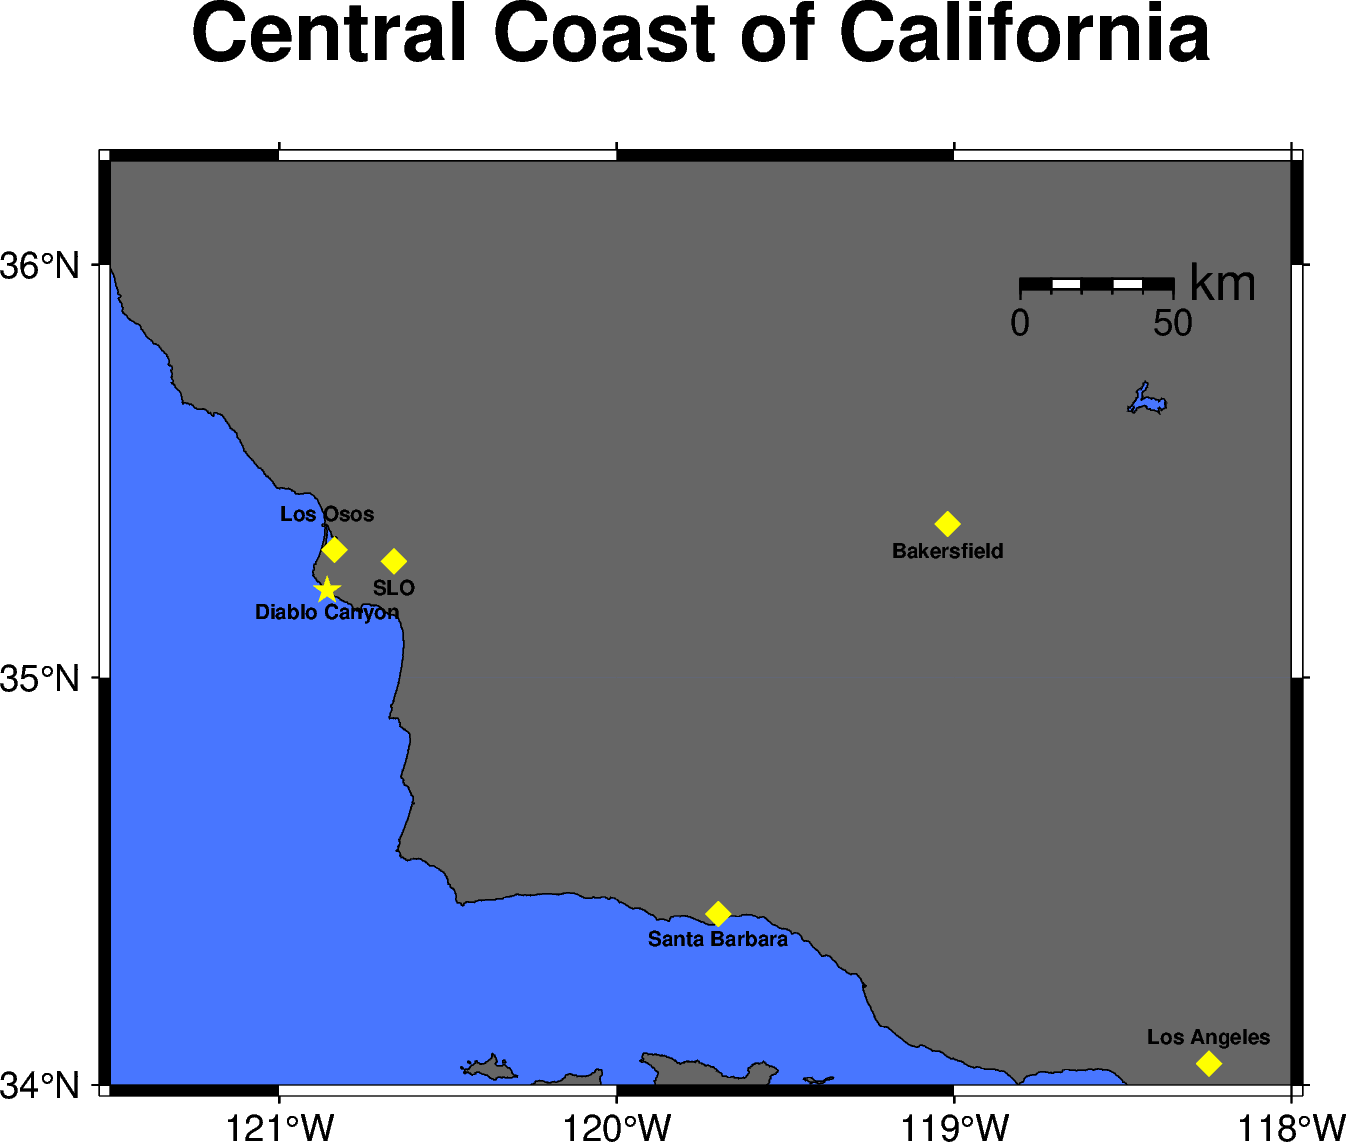

In [2]:
fig = pygmt.Figure()
fig.coast(
    region=[-121.5, -118, 34, 36.25],
    shorelines=True,
    land="#666666",
    water="royalblue1",
    projection="M10c",
    map_scale="jTR+o1c/1c+c-7+w50k+f+lkm+ar",
    frame=["a", "+tCentral Coast of California"],
)

# Diablo Canyon
fig.plot(x=-120.8578, y=35.2121, style="a0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-120.8578, y=35.16, text="Diablo Canyon", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Los Osos
fig.plot(x=-120.8357, y=35.3108, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-120.8578, y=35.4, text="Los Osos", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Santa Barbara
fig.plot(x=-119.6982, y=34.4208, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-119.6982, y=34.36, text="Santa Barbara", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# San Luis Obispo
fig.plot(x=-120.6596, y=35.2828, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-120.6596, y=35.22, text="SLO", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Bakersfield
fig.plot(x=-119.0187, y=35.3733, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-119.0187, y=35.31, text="Bakersfield", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Los Angeles
fig.plot(x=-118.2437, y=34.0522, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-118.2437, y=34.12, text="Los Angeles", font="5p,Helvetica-Bold,black", offset="j0.2/0.2") 

fig.show()

As you drive Highway 1, otherwise known as the Pacific Coast Highway, on the Central Coast of California you'll witness a landscape of rolling hills with the twisted limbs of pygmy oaks dripping with lichen. As you arrive in San Luis Obispo, population 49,244, you turn west, towards the ocean, taking Los Osos Valley Road for its full extent of 15 miles. The south side of the valley are the Irish Hills, formed as the Franciscan Complex slowly lifted due to tectonics over the past million years. The north side is composed of a chain of ancient volcanic plugs known today as the seven sisters. As you reach the Ocean you pass through the sleepy seaside town of retirees and young families know as Los Osos, population 15,523 and south along the coast through the state park Montana de Oro. Past the sandstone white bluffs sits Diablo Canyon, a nuclear power plant that produces 6% of California's power.
	
Although this powerplant is nestled out of site and is strictly fenced in it has been a huge conversation across all of California. Under this picturesque coastal landscape sits the longest and most active fault in the continental United States, the San Andreas Fault, and all its subsidiary faults. These subsidiary faults are influenced by the San Andreas and can independently produce large earthquakes such as the 2003 San Simeon Earthquake, a 6.6 magnitude earthquake caused by thrust faulting in the Oceanic fault zone within the Santa Lucia Mountains. These dangers are not new to residents. In fact, the San Luis Obispo government provides residents that would be in the greatest danger in the case of a nuclear melt down with Potassium iodide (KI) tablets. This tablet provides safe iodide for the body's thyroid to absorb, the thyroid can only absorb so much iodine and the hope is for it to not absorb any of the nuclear iodide. 

## Introduction 

On August 25, 2024 the LA Times published a 2500 word article on Diablo Canyon. This article by itself was not special, a quick search reveals hundreds plenty of think pieces and exposes published since 2016. For the past decade the California Public Utilities Commission has been pushing back the deadline to shut down this nuclear power plant, opened in 1985 and Californias last nuclear power plant. The anti-nuclear power plant side reminds us to look at Fukushima, a coastal nuclear power plant in Japan that suffered a level seven incident on the International Nuclear Event Scale after a 9.0 earthquake. The pro-nuclear side reminds us that PG&E has stated that a Fukushima flooding episode, the actual source of the incident was the tsunami based flooding as the reactors shut down as soon as the shaking began, would be impossible at Diablo Canyon.


Regardless of if the plant shuts down or not due to the closure of the Yucca Mountain Nuclear Waste Repository under Obamas administration, nuclear power plants across America, including Diablo Canyon, do not have any designated long-term storage for their high-level radioactive waste. This waste is stored on site, and will be for the foreseeable future. Diablo Canyon carries an approximately 1 in 25,000 chance of suffering a nuclear melt down. The question I will attempt to answer in this research paper is what are the chances that an earthquake hits Diablo Canyon that exceeds the intensity that it can withstand? This would mean mapping where the faults are, how much they're slipping to trigger earthquakes, and determining when these earthquakes hit, how much shaking they might cause. Similar research has been conducted in the paper “A new GPS velocity field for the Pacific Plate” (DeMets et al) and “Interseismic Strain Localization in the San Jacinto Fault Zone” (Lindsey et al.) that I will reference throughout this paper.


## Methods

### Initialize
The first step to writing this code is to define the parameters and import the data. This step will include creating the arrays which I will address in a later markdown first we must import the packages we need numpy for numerical operations and array handling and matplotlib for plotting. In this I will be using the quiver function of matplotlib as I will be visulizing vector fields. 

### PyGMT
PyGMT is a mapping softwear so all we need is to put the coordinates of the region were looking at which is is: [-121, -118, 34, 36.25]. These bounds can be changed as needed.

### Data Set
#### File I/O
File I/O is how the data is written. This includes the multiple columns. This data was written by USGS and includes many data lines that we can skip. Importing the data lines we want without including the lines of unnessicary data can be done by including the line 'skiprows =' with the number of rows we want to skip within the np.loadtxt() line of code. We can also select the columns we want to load by including the line of code 'usecols = ((...), unpack = True)' within the np.loadtxt( ) line of code as well.

The lines of code we want for this project is the North Latitude and East Longitude (this will show where the fault movement is within the map of California), the rate of change of a quantity North and East with respect to time (this will show the faults movement direction throughout time), the change in velocity throughout time (this will show the strength of the faults movement though time), and all of their uncertanties.

These columns are usually denoted as:

- Ref_Nlat - North Latitude coordinate location

- Ref_Elong - East Latitude coordinate location

- $\frac{dN}{dt}$ - GPS northern movement through time

- $\frac{dE}{dt}$ - GPS eastern movement through time

- $\frac{dV}{dt}$ - GPS vertical through time

- SNd - North uncertanties

- SEd - East uncertanties

- SVd  - Vertical uncertanties

For text file NAM_CentralCalifornia_SGPS_vels.txt (USGS Velocity File in NAM, Downloaded from https://earthquake.usgs.gov/monitoring/gps/CentralCalifornia_SGPS/velocities on 2023-07-07 08:54:50.405762) the names of the columns are:

Station [0] Longitude [1] Latitude [2] Elevation [3] "Velocity (E)" [4] "Velocity (N)" [5] "Sigma (E)" [6] "Sigma (N)" [7] "Correlation (N-E)" [8] "Velocity (U)" [9] "Sigma (U)" [10] (because this is python you begin counting at 0)

In the text below I set up the columns that I need to data name that it corrisponds to:

In [3]:
# load text file 
Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd = np.loadtxt(
    "FILT_CentralCalifornia_SGPS_vels.txt",
    skiprows=2,
    usecols=(1, 2, 4, 5, 6, 7, 9, 10),
    unpack=True
)
print(np.shape(dEdt))

(135,)


#### Filter out noisy data
Two ways: 
1) Uncertantity is too great 
2) if velocity arrow is greater that 100 mm per year 
    
    The function filter_dVdt takes a list of dictionaries (data) and a threshold value of (100mm). It uses a list comprehension to create a new list (filtered_data) that only includes entries where dVdt is less than or equal to the threshold. This filtered out 5 velocity arrows greater than 100mm.
    
    The function uncertantity takes a list of dictionaries (data) and a threshold value of (10m). It uses a list comprehension to create a new list (filtered_data) that only includes entries where dVdt is less than or equal to the threshold. This filtered out 15 velocity arrows greater than 100mm.

Black box function

In [4]:
def filter_uncertantity(Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd, threshold=10):
    """
    Filter out entries with an uncertantity greater than 10mm/yr
    """
    # Create a boolean mask for filtering
    filtered_indices = SNd <= threshold
    print(filtered_indices)
    filtered_indices = SEd <= threshold
    filtered_indices = SVd <= threshold
    print(filtered_indices)

    # Filter and return the data
    return (
        Ref_Elong[filtered_indices],
        Ref_Nlat[filtered_indices],
        dEdt[filtered_indices],
        dNdt[filtered_indices],
        SNd[filtered_indices],
        SEd[filtered_indices],
        dVdt[filtered_indices],
        SVd[filtered_indices]
    )
    return

Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd = filter_uncertantity(Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd)

print(np.shape(dNdt))
    
def filter_dVdt(Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd, threshold=100):
    """
    Filters out data with dVdt greater than the specified threshold (in mm/yr).

    Parameters:
        Ref_Elong (ndarray): Reference elongation data.
        Ref_Nlat (ndarray): Reference latitude data.
        dEdt (ndarray): Change in east component.
        dNdt (ndarray): Change in north component.
        SNd (ndarray): Standard deviation in north.
        SEd (ndarray): Standard deviation in east.
        dVdt (ndarray): Change in volume over time.
        SVd (ndarray): Standard deviation of volume change.
        threshold (float): The threshold value for dVdt (default is 100 mm/yr).

    Returns:
        tuple: Filtered arrays for each input.
    """
    # Create a boolean mask for filtering
    filtered_indices = dVdt <= threshold
    print(filtered_indices)

    # Filter and return the data
    return (
        Ref_Elong[filtered_indices],
        Ref_Nlat[filtered_indices],
        dEdt[filtered_indices],
        dNdt[filtered_indices],
        SNd[filtered_indices],
        SEd[filtered_indices],
        dVdt[filtered_indices],
        SVd[filtered_indices]
    )
    return 

Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd = filter_dVdt(Ref_Elong, Ref_Nlat, dEdt, dNdt, SNd, SEd, dVdt, SVd)

#The lengths of dEdt, dNdt, and dVdt must be the same
print(np.shape(dEdt))
print(np.shape(dNdt))
print(np.shape(dVdt))

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True]
[ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True 

### Vector data
The vector imputs are longitude, latitude, angle, and magnitude. When looking at the vector these componates make up a right triangle longitude is the length on the x axis (the base of the right triangle), at the latitude is the distance of the y-axis (the height of the right triangle). The magnitude of the vector would be the hypotenuse of the right triangle found by using the pythagorean theorem:

$\sqrt{x^2 + y^2} = c$

 where c is the magnitude. The reference angle of this right triangle would be the angle of the vector. That would be solved by using:
 
 $\arctan \frac{y}{x}$
 
 Now from the GPS stating point there is an arrow the length of the hypotenuse going in the direction of the referance angle that represents the movement of that GPS station.

### PyGMT Project 

The project module in PyGMT is a tool that visualizes data along a user-defined path. In this project I will be sampling points along the transect to create projections of magnitude in milimeters per year by distance in kilometers. 

The meat of this project will be the graphs of the transects of GPS velocity fields taken approximately parallel and orthagional to the San Andreas Fault in Central California.

## Results 


### Map of Central California with Faults and Vectors overlaid

In [14]:
def compute_angle_mag (dEdt, dNdt):
    mag,angle=[],[]
    
    for i in range(len(dEdt)):
        mag_i = np.sqrt(dEdt[i]**2+dNdt[i]**2)
        mag.append(mag_i)
        ang_i = np.arctan2(dNdt[i],dEdt[i])
        angle.append(np.rad2deg(ang_i))
        
    return np.array(mag), np.array(angle)

m1,a1 = compute_angle_mag(dEdt,dNdt)

#quantity for normalizing vector DO TO SCALE TOOO
norm = 40

# Prepare data for vector scale for scale bar
vector_scale = pd.DataFrame({
    "longitude": np.array([-118.65]),
    "latitude": np.array([36.03]),
    "angle": np.array([0]),
    "magnitude": np.array(np.divide(20,norm))
})

# Prepare data for vector plotting in a DataFrame
vector_data = pd.DataFrame({
    "longitude": Ref_Elong,
    "latitude": Ref_Nlat,
    "angle": a1,
    "magnitude": np.divide(m1,norm)
})

# Data that is not scaled to use for projection graphs
project_data_raw = pd.DataFrame({
    "longitude": Ref_Elong,
    "latitude": Ref_Nlat,
    "angle": a1,
    "magnitude": m1
})


# Initialize the figure
fig = pygmt.Figure()
fig.coast(
    region=[-121.5, -118, 34, 36.25],
    shorelines=True,
    land="#666666",
    water="royalblue1",
    projection="M10c",
    map_scale="jTR+o1c/1c+c-7+w50k+f+lkm+ar",
    frame=["a", "+tCentral Coast of California"],
)

# Plot the fault lines
fig.plot("Historic.txt", pen=".5p,gray")
fig.plot("Quaternary.txt", pen=".5p,gray")

# Plot the location of GPS as red dots
fig.plot(x = Ref_Elong, y = Ref_Nlat, pen=".25p,black", style = "c0.025i", fill="red")  # Red dot with .25-point thickness

# Plot vectors from the data table
fig.plot(
    data=vector_data,
    style="v.3c+e",  # Vector style with arrow
    pen=".5p",
    fill="red3"
)

fig.plot(
    data=vector_scale,
    style="v.3c+e",  # Vector style with arrow
    pen=".5p",
    fill="red3"
)

# Add uncertianty


# Plot landmarks with custom symbols and labels
# Diablo Canyon
fig.plot(x=-120.8578, y=35.2121, style="a0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-120.8578, y=35.16, text="Diablo Canyon", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Santa Barbara
fig.plot(x=-119.6982, y=34.4208, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-119.6982, y=34.36, text="Santa Barbara", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# San Luis Obispo
fig.plot(x=-120.6596, y=35.2828, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-120.6596, y=35.22, text="SLO", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Bakersfield
fig.plot(x=-119.0187, y=35.3733, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-119.0187, y=35.31, text="Bakersfield", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

# Los Angeles
fig.plot(x=-118.2437, y=34.0522, style="d0.2c", fill="yellow", pen=".4p,yellow")
fig.text(x=-118.2437, y=34.12, text="Los Angeles", font="5p,Helvetica-Bold,black", offset="j0.2/0.2")

#Faults 
#San Andreas
fig.text(x=-119.55, y=35.141, text="San Andreas Fault", font="4p,Helvetica-Bold,black", offset="j0.2/0.2")

#Nacimiento Fault Zone
fig.text(x=-120.8000, y=35.7, text="NFZ", font="4p,Helvetica-Bold,black", offset="j0.2/0.2")

#Garlock Fault
fig.text(x=-118.8284, y=35.2045, text="Garlock Fault", font="4p,Helvetica-Bold,black", offset="j0.2/0.2")

#Vector scale label
fig.text(x=-118.575, y=36.1, text="10 mm/yr", font="6p,Helvetica-Bold,black", offset="j0.2/0.2")

#make star with center of profile

#projection SJ- profile width in km
fig.plot(x=-120.3, y=35.5, style="J50/200/50")

#pygmt.project on vector data
pygmt.project(data=project_data_raw, 
              center = "-120.3/35.5",
              azimuth = 50, 
              output_type='file', 
              outfile="projected_data.txt",
              length=[-100,100],
              width=[-25,25],
              unit=True)


# Show the figure
fig.show()

SyntaxError: positional argument follows keyword argument (1740533803.py, line 136)

### Transects of GPS velocity fields taken approximately parallel and orthagional to the San Andreas Fault in Central California.

The project figure takes in information x, y, and z and returns x, y, z, p, q, r, s where x is longitude, where y isclatitude, and z is both the angle and magnitude. P and q are the new x, y coordinates rotated approximately parallel and orthogonal to the San Andreas Fault of central California, and r and s are the positions in the coordinate system of the point on the profile. To create the scatter plots I only need z row two (the magnitude) and row p (the distance parallel to the San Andreas fault.

-36.17577703145241
42


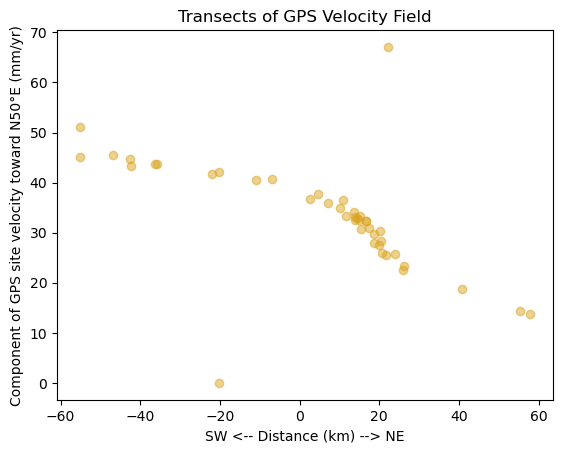

In [11]:
ang, v, x = np.loadtxt("projected_data.txt",
           usecols=(2,3,4),
           unpack=True)
# average angle of vector in projection
print(90-(sum(ang)/len(ang)))
#length of projection data
print(len(x))



plt.scatter(x,v, color='goldenrod',alpha=.5)
plt.title('Transects of GPS Velocity Field')
plt.xlabel('SW <-- Distance (km) --> NE')
plt.ylabel('Component of GPS site velocity toward N50°E (mm/yr)')
plt.show()

## Discussion

To continue this research project I would create more projections and graph the transects. I would then run models of the fault slipping to determine how the faults are moving relative to one another. This would allow me determine where creep zones are or where there may be irregularities preventing the fault movement and may have a build up of stress. 
This process will need to be repeated on more projections by repeating the code that I have above along different sections of the San Andreas and its subsidiary faults as DeMets et al did in their 2014 paper. This can be done by using matplotlibs subplot function (a function that allows mt to position plots in a grid using the parameters num_rows, num_columns, and idex. Creating more models will provide a larger picture on the fault hazards on the central coast, and would make this discussion section juicier. 
Once finished the discussion would include analysis on creep, geothermal, lithium, and carbon sequestration.